In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Importing dataset
df=pd.read_csv("Cholera_Report_Cleaned_new.csv")
df.head(10)

,Year,Epi_Week,Suspected_Cases,Confirmed_Cases,Deaths,CFR,Total_Cases,States
0,2021,3,11,0,0.0,0.00,11,"Adamawa, Nasarawa"
1,2021,4,2,0,0.0,0.00,2,"Crossriver, Nasarawa"
2,2021,5,87,1,5.0,5.75,88,"Bayelsa, kaduna, Kogi"
3,2021,6,12,0,0.0,0.00,12,"Delta, Kaduna, Kano"
4,2021,7,38,0,0.0,0.00,38,"Bauchi, Kogi"
5,2021,8,4,0,0.0,0.00,4,"Bauchi, Delta"
6,2021,9,29,0,0.0,0.00,29,Benue
7,2021,10,11,0,0.0,0.00,11,Oyo
8,2021,11,71,0,7.0,9.86,71,"Bayelsa, Kebbi"
9,2021,12,19,1,0.0,0.00,20,"Bayelsa, Kogi"


In [6]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             122 non-null    int64  
 1   Epi_Week         122 non-null    int64  
 2   Suspected_Cases  122 non-null    int64  
 3   Confirmed_Cases  122 non-null    int64  
 4   Deaths           121 non-null    float64
 5   CFR              122 non-null    float64
 6   Total_Cases      122 non-null    int64  
 7   States           122 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 7.8+ KB


In [7]:
# Handling null values
df = df.dropna(subset=['Deaths'])
df['Deaths'].isna().sum()


np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 121
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             121 non-null    int64  
 1   Epi_Week         121 non-null    int64  
 2   Suspected_Cases  121 non-null    int64  
 3   Confirmed_Cases  121 non-null    int64  
 4   Deaths           121 non-null    float64
 5   CFR              121 non-null    float64
 6   Total_Cases      121 non-null    int64  
 7   States           121 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 8.5+ KB


In [9]:
# checking for duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
117,False
118,False
119,False
120,False


In [10]:
# Before cleaning
print("Original shape:", df.shape)

Original shape: (121, 8)


In [11]:
# Detecting and handling Outliers using IQR

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Loop through each numeric column and remove rows with outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [12]:
# After cleaning
print("New shape:", df.shape)

New shape: (66, 8)


Since the shape before and after handling outliers remain the same, it is an indication that there are no outliers in the datset

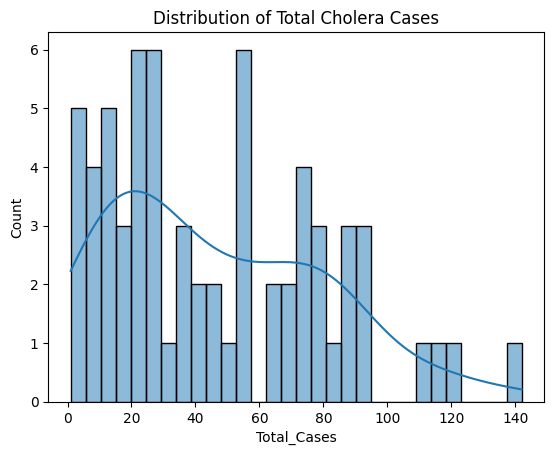

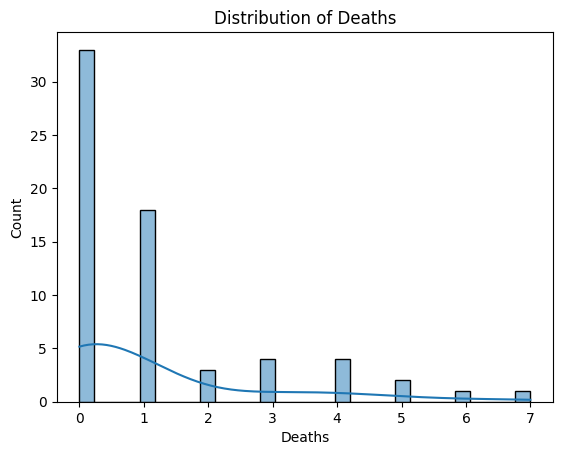

In [13]:
# Distribution plots
sns.histplot(df['Total_Cases'], bins=30, kde=True)
plt.title('Distribution of Total Cholera Cases')
plt.show()

sns.histplot(df['Deaths'], bins=30, kde=True)
plt.title('Distribution of Deaths')
plt.show()


The histogram shows the spread of total cases and deaths. Most values cluster around certain ranges indicating that there were fewer cases of high cholera cases and death. A right-skewed plot confirms that most weeks had few deaths, with a few weeks having spikes.

In [14]:
df.columns
df.head()


,Year,Epi_Week,Suspected_Cases,Confirmed_Cases,Deaths,CFR,Total_Cases,States
0,2021,3,11,0,0.0,0.00,11,"Adamawa, Nasarawa"
1,2021,4,2,0,0.0,0.00,2,"Crossriver, Nasarawa"
2,2021,5,87,1,5.0,5.75,88,"Bayelsa, kaduna, Kogi"
3,2021,6,12,0,0.0,0.00,12,"Delta, Kaduna, Kano"
4,2021,7,38,0,0.0,0.00,38,"Bauchi, Kogi"


In [15]:
def get_season(week):
    if 18 <= week <= 43:
        return 'Rainy'
    else:
        return 'Dry'

df['Season'] = df['Epi_Week'].apply(get_season)

print(df[['Epi_Week', 'Season']].head(10))


   Epi_Week Season
0         3    Dry
1         4    Dry
2         5    Dry
3         6    Dry
4         7    Dry
5         8    Dry
6         9    Dry
7        10    Dry
8        11    Dry
9        12    Dry


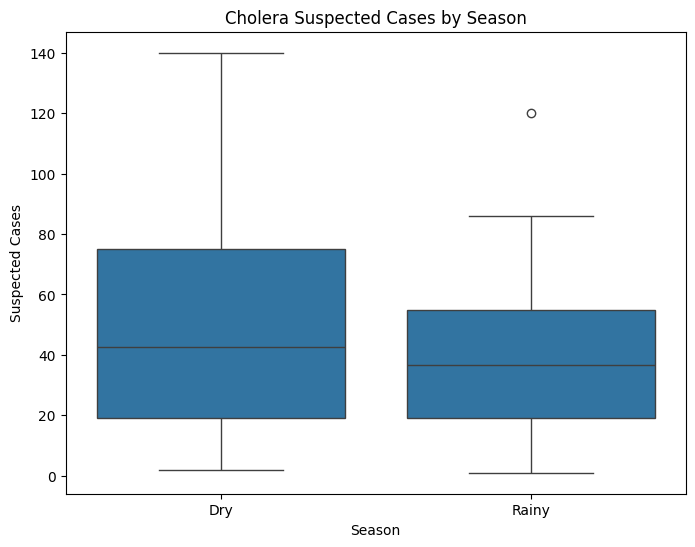

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Season', y='Suspected_Cases')
plt.title('Cholera Suspected Cases by Season')
plt.xlabel('Season')
plt.ylabel('Suspected Cases')
plt.show()


In [18]:
# Create a proper datetime from Year and Epi_Week
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Epi_Week'].astype(str) + '1', format='%G%V%u', errors='coerce')

# Extract month name
df['Month'] = df['Date'].dt.strftime('%B')


In [19]:
df.head()

,Year,Epi_Week,Suspected_Cases,Confirmed_Cases,Deaths,CFR,Total_Cases,States,Season,Date,Month
0,2021,3,11,0,0.0,0.00,11,"Adamawa, Nasarawa",Dry,2021-01-18,January
1,2021,4,2,0,0.0,0.00,2,"Crossriver, Nasarawa",Dry,2021-01-25,January
2,2021,5,87,1,5.0,5.75,88,"Bayelsa, kaduna, Kogi",Dry,2021-02-01,February
3,2021,6,12,0,0.0,0.00,12,"Delta, Kaduna, Kano",Dry,2021-02-08,February
4,2021,7,38,0,0.0,0.00,38,"Bauchi, Kogi",Dry,2021-02-15,February


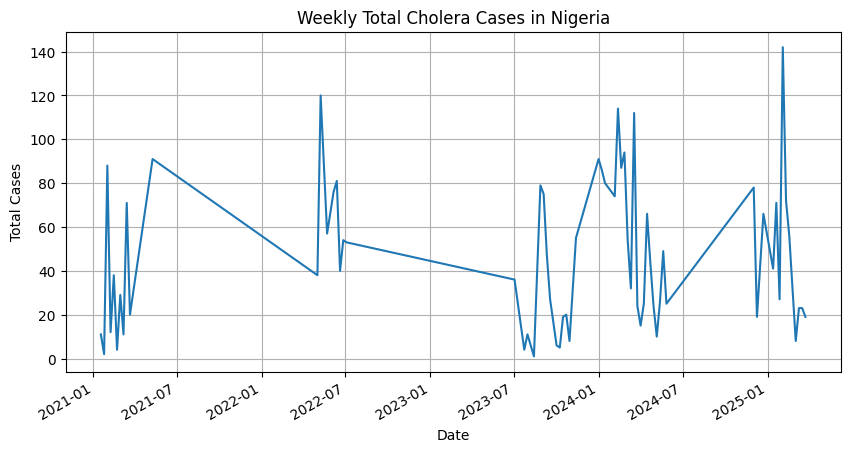

In [22]:
# Trend over time
# Time series of cases
import datetime

df['Date'] = df.apply(lambda row: datetime.datetime.strptime(f"{int(row['Year'])}-{int(row['Epi_Week'])}-1", "%Y-%W-%w"), axis=1)

df.groupby('Date')['Total_Cases'].sum().plot(figsize=(10,5), title='Weekly Total Cholera Cases in Nigeria')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()


In [23]:
df['Month'] = df['Date'].dt.month


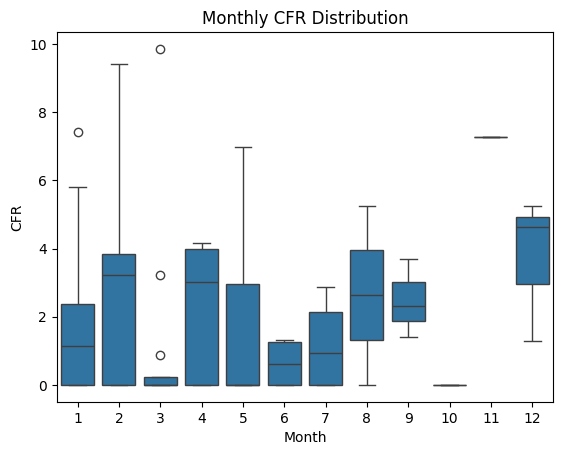

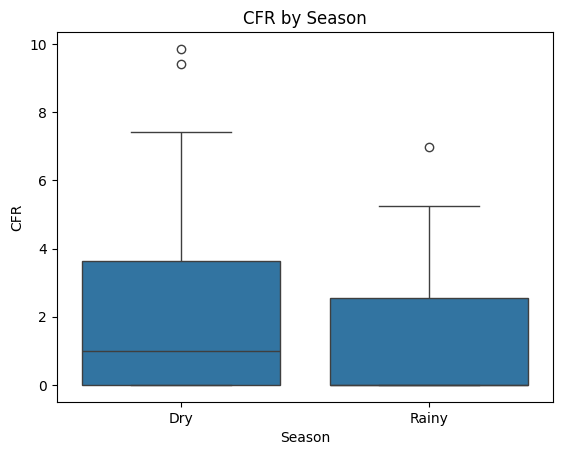

In [24]:
# CFR by month
sns.boxplot(x='Month', y='CFR', data=df)
plt.title('Monthly CFR Distribution')
plt.show()

# CFR by season
sns.boxplot(x='Season', y='CFR', data=df)
plt.title('CFR by Season')
plt.show()


The box plot shows the distribution of cases through the year.  High CFR in some months could suggest poor healthcare access or delayed response.




In [49]:
# Group by state and sum the total cases
state_cases = df.groupby('States')['Total_Cases'].sum().sort_values(ascending=False)

# Display all states with their case counts
print("Cholera Cases by State:")
print(state_cases)

# Display the state with the highest number of cases
most_affected_state = state_cases.idxmax()
most_cases = state_cases.max()

print(f"\nState with the most cases: {most_affected_state} ({most_cases} cases)")


Cholera Cases by State:
States
Oyo, Lagos, Benue, Enugu, Imo, Abia, Akwa Ibom, Rivers, Bayelsa, Delta                                      142
Crossriver, Kano, Kastina                                                                                   120
Zamfara, Katsina, Kano, Bauchi, Gombe, Ogun, Osun, Ekiti, Bayelsa, Rivers, Akwa Ibom, Delta, Imo, Ebonyi    114
Katsina, Kano, Niger, Osun, Delta, Bayelsa, Imo, Abia, Ebonyi                                               112
Niger, Zamfara, Katsina, Jigawa, Borno, Osun, Ondo, Bayelsa, Delta, Rivers, Imo, Abia, Ebonyi                94
                                                                                                           ... 
Ogun, Oyo                                                                                                     5
Bauchi, Delta                                                                                                 4
Niger, Adamawa                                                           

By this analysis, the states with the most cases between 2021 and 2025 are:

Oyo, Lagos, Benue, Enugu, Imo, Abia, Akwa Ibom, Rivers, Bayelsa and Delta

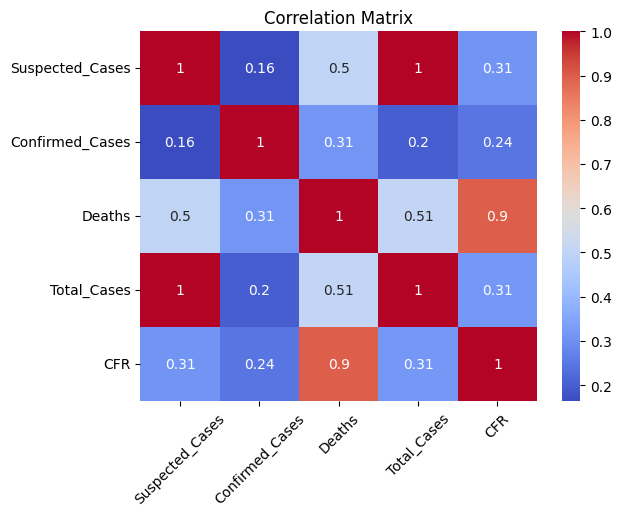

In [25]:
# Check correlation
sns.heatmap(df[['Suspected_Cases', 'Confirmed_Cases', 'Deaths', 'Total_Cases', 'CFR']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()


Values close to 1 or -1 indicates strong correlation. **Total_Cases** shows a moderately positive correlation with **Deaths**, so more cases means more deaths.

Since CFR doesn’t correlate well with other variables, it may be influenced by external factors (e.g., healthcare quality, reporting delays, environmental conditions).

In [26]:
# Drop Date column from df_model
df_model = df.drop(['Date'], axis=1)


In [27]:
df.columns

Index(['Year', 'Epi_Week', 'Suspected_Cases', 'Confirmed_Cases', 'Deaths',
       'CFR', 'Total_Cases', 'States', 'Season', 'Date', 'Month'],
      dtype='object')

## Building a model

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# One-hot encode directly on the full DataFrame
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_states = encoder.fit_transform(df[['States']])

# Convert encoded features to DataFrame
encoded_df = pd.DataFrame(encoded_states, columns=encoder.get_feature_names_out(['States']))

# Drop original 'States' and concatenate encoded features
df_encoded = pd.concat([df.drop(columns='States').reset_index(drop=True), encoded_df], axis=1)

# split
X = df_encoded.drop(columns='Suspected_Cases')
y = df_encoded['Suspected_Cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
X_train['Year'] = X_train['Date'].dt.year
X_train['Month'] = X_train['Date'].dt.month
X_train['Week'] = X_train['Date'].dt.isocalendar().week
X_train = X_train.drop(columns=['Date'])

X_test['Year'] = X_test['Date'].dt.year
X_test['Month'] = X_test['Date'].dt.month
X_test['Week'] = X_test['Date'].dt.isocalendar().week
X_test = X_test.drop(columns=['Date'])


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Select all categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

# Create ColumnTransformer to encode them
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Keep all other (numeric) columns
)

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as a different type depending on the ColumnTransformer inputs.
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [])])),
                ('regressor', RandomForestRegressor(random_state=42))])

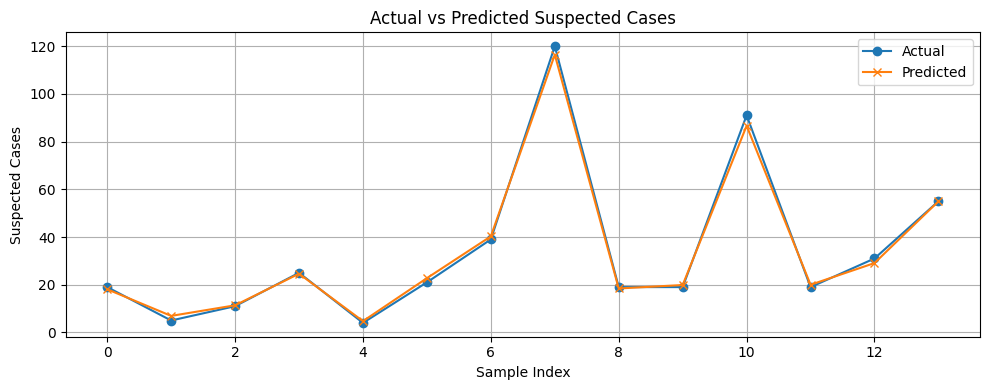

In [54]:
predictions = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(predictions, label='Predicted', marker='x')
plt.title('Actual vs Predicted Suspected Cases')
plt.xlabel('Sample Index')
plt.ylabel('Suspected Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:

# Make predictions
predictions = model.predict(X_test)

# Create DataFrame to compare
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions})

print(comparison_df.head(10))


   Actual  Predicted
0      19      18.09
1       5       6.93
2      11      11.37
3      25      24.62
4       4       4.73
5      21      22.75
6      39      40.28
7     120     116.42
8      19      18.43
9      19      19.87


In [56]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 1.41
MSE: 3.41
R²: 1.00


TO BUILD A MODEL THAT PREDICTS OUTBREAK OR NO OUTBREAK



In [80]:
threshold = 65
df['Outbreak'] = df['Suspected_Cases'].apply(lambda x: 1 if x > threshold else 0)


In [81]:
# Preparing Features and Labels
X = df[['Season', 'Epi_Week', 'Year', 'States']]
y = df['Outbreak']


In [82]:
X_encoded = pd.get_dummies(X)


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [84]:
# Train a Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [85]:
# Evaluate the Model
y_pred = model.predict(X_test)


In [86]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[12  0]
 [ 1  1]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.50      0.67         2

    accuracy                           0.93        14
   macro avg       0.96      0.75      0.81        14
weighted avg       0.93      0.93      0.92        14



**Interpretation:**

The model demonstrates strong performance on the majority class, "No Outbreak" (Class 0), achieving a recall of 1.00 and precision of 0.92. This means it successfully identified all actual non-outbreak cases, with only one false negative where an actual outbreak was misclassified as a non-outbreak.

For the minority class, "Outbreak" (Class 1), the model achieved a precision of 1.00, indicating that all predicted outbreak cases were correct (no false positives). However, the recall was 0.50, meaning the model detected only one out of the two actual outbreak cases. This reflects a trade-off introduced by adjusting the decision threshold — reducing false positives while slightly increasing the risk of missing some true outbreaks.

The model maintains a high level of accuracy while showing strong specificity. However, there is room for improving sensitivity to better capture minority class instances without sacrificing precision.

PREDICTING AN OUTBREAK

In [64]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Recalculate CFR_pct
df['CFR_pct'] = (df['Deaths'] / df['Suspected_Cases']) * 100

# Drop rows with missing values
df = df.dropna(subset=['Season', 'States', 'Suspected_Cases', 'Confirmed_Cases', 'Deaths', 'CFR_pct', 'Outbreak'])

# Label encode 'Season'
le = LabelEncoder()
df['Season'] = le.fit_transform(df['Season'])

# One-hot encode 'States'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use sparse_output for sklearn >= 1.2
encoded_states = encoder.fit_transform(df[['States']])
encoded_state_df = pd.DataFrame(encoded_states, columns=encoder.get_feature_names_out(['States']))

# Combine features
X = pd.concat([encoded_state_df.reset_index(drop=True), df[['Season', 'Suspected_Cases', 'Confirmed_Cases', 'Deaths', 'CFR_pct']].reset_index(drop=True)], axis=1)

# Target variable
y = df['Outbreak'].reset_index(drop=True)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)


RandomForestClassifier(random_state=42)

In [65]:
# Sample input
new_data = pd.DataFrame({
    'States': ['Kebbi'],
    'Season': ['Rainy'],
    'Suspected_Cases': [40],
    'Confirmed_Cases': [15],
    'Deaths': [3]})

# Compute CFR_pct
new_data['CFR_pct'] = (new_data['Deaths'] / new_data['Confirmed_Cases']) * 100


In [66]:
print(le.classes_)


[0 1]


In [67]:
# Use the index of the season
season_map = {'Dry': 0, 'Harmattan': 1, 'Rainy': 2}
new_data['Season'] = season_map['Rainy']


In [68]:
# Make a prediction
new_states = encoder.transform(new_data[['States']])

new_X = pd.concat([
    pd.DataFrame(new_states, columns=encoder.get_feature_names_out(['States'])),
    new_data[['Season', 'Suspected_Cases', 'Confirmed_Cases', 'Deaths', 'CFR_pct']]
], axis=1)

prediction = model.predict(new_X)
print("Prediction:", "Outbreak" if prediction[0] == 1 else "No Outbreak")


Prediction: No Outbreak


In [69]:
df.head()

,Year,Epi_Week,Suspected_Cases,Confirmed_Cases,Deaths,CFR,Total_Cases,States,Season,Date,Month,Outbreak,CFR_pct
0,2021,3,11,0,0.0,0.00,11,"Adamawa, Nasarawa",0,2021-01-18,1,0,0.000000
1,2021,4,2,0,0.0,0.00,2,"Crossriver, Nasarawa",0,2021-01-25,1,0,0.000000
2,2021,5,87,1,5.0,5.75,88,"Bayelsa, kaduna, Kogi",0,2021-02-01,2,1,5.747126
3,2021,6,12,0,0.0,0.00,12,"Delta, Kaduna, Kano",0,2021-02-08,2,0,0.000000
4,2021,7,38,0,0.0,0.00,38,"Bauchi, Kogi",0,2021-02-15,2,0,0.000000


In [70]:
import pickle

# Save trained model
with open('cholera_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save encoders
with open('season_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

with open('state_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


In [71]:
from google.colab import files
files.download('cholera_model.pkl')
files.download('season_encoder.pkl')
files.download('state_encoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>